In [1]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

In [2]:
df=pd.read_csv('smoking_driking_dataset_Ver01.csv')

In [3]:
df.nunique().sort_values()

sex                    2
hear_right             2
hear_left              2
DRK_YN                 2
SMK_stat_type_cd       3
urine_protein          6
height                13
age                   14
sight_left            24
sight_right           24
weight                24
DBP                  127
SBP                  171
serum_creatinine     183
hemoglobin           190
HDL_chole            223
LDL_chole            432
tot_chole            474
BLDS                 498
SGOT_AST             568
SGOT_ALT             594
waistline            737
gamma_GTP            940
triglyceride        1657
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [5]:
df.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [6]:
df.shape

(991346, 24)

In [7]:
df = df.drop_duplicates(keep='first')


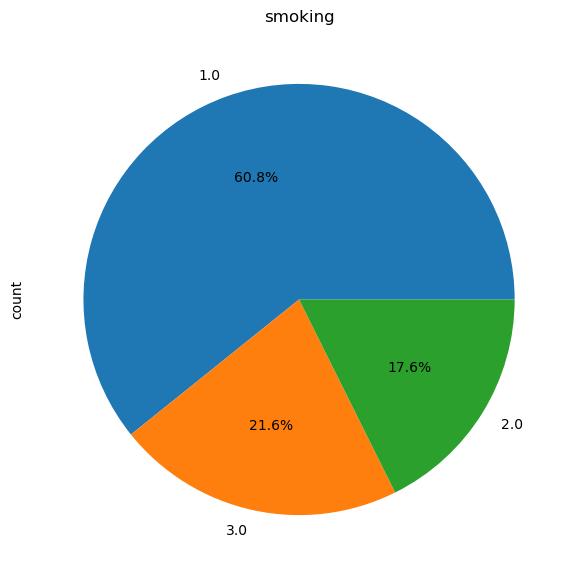

In [8]:
fig, axes = plt.subplots(figsize=(7, 7))
df['SMK_stat_type_cd'].value_counts().plot.pie(autopct='%1.1f%%')
axes.set_title('smoking')
plt.show()

In [9]:
df['SMK_stat_type_cd'].value_counts()

SMK_stat_type_cd
1.0    602431
3.0    213945
2.0    174944
Name: count, dtype: int64

                    min     max
age                20.0    85.0
height            130.0   190.0
weight             25.0   140.0
waistline           8.0   999.0
sight_left          0.1     9.9
sight_right         0.1     9.9
hear_left           1.0     2.0
hear_right          1.0     2.0
SBP                67.0   273.0
DBP                32.0   185.0
BLDS               25.0   852.0
tot_chole          30.0  2344.0
HDL_chole           1.0  8110.0
LDL_chole           1.0  5119.0
triglyceride        1.0  9490.0
hemoglobin          1.0    25.0
urine_protein       1.0     6.0
serum_creatinine    0.1    98.0
SGOT_AST            1.0  9999.0
SGOT_ALT            1.0  7210.0
gamma_GTP           1.0   999.0
SMK_stat_type_cd    1.0     3.0


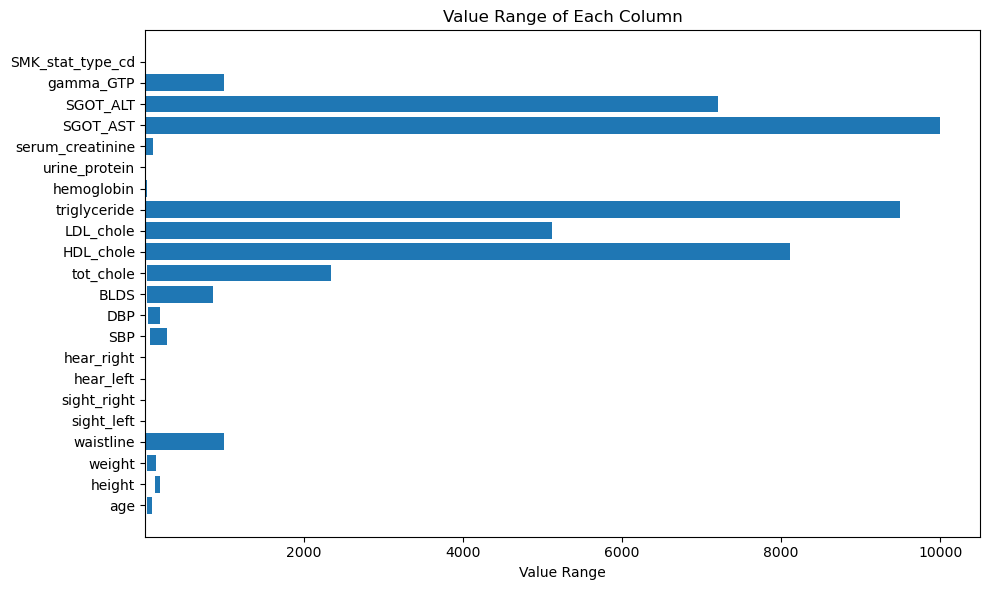

In [10]:
import matplotlib.pyplot as plt

summary = df.describe().loc[["min", "max"]].T
print(summary)
summary["range"] = summary["max"] - summary["min"]

plt.figure(figsize=(10, 6))
plt.barh(summary.index, summary["range"], left=summary["min"])
plt.xlabel("Value Range")
plt.title("Value Range of Each Column")
plt.tight_layout()
plt.show()

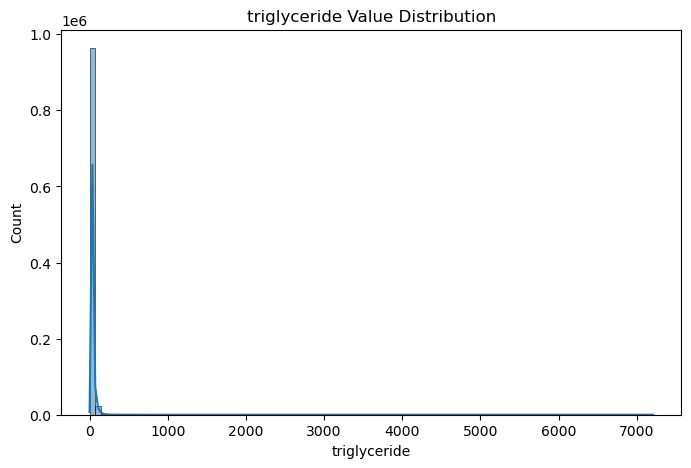

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(df["SGOT_ALT"], bins=100, kde=True)  
plt.title("triglyceride Value Distribution")
plt.xlabel("triglyceride")
plt.ylabel("Count")
plt.show()

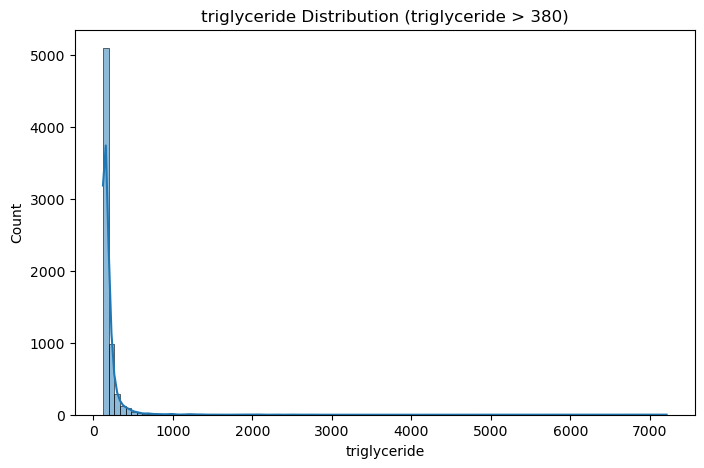

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(df[df["SGOT_ALT"] >120]["SGOT_ALT"], bins=100, kde=True)
plt.title("triglyceride Distribution (triglyceride > 380)")
plt.xlabel("triglyceride")
plt.ylabel("Count")
plt.show()


In [13]:
df = df[df["SGOT_ALT"] > 5]
df = df[df["SGOT_ALT"] < 120]

df = df[df["SGOT_AST"] > 10]
df = df[df["SGOT_AST"] < 100]

df = df[df["LDL_chole"] < 250]
df = df[df["LDL_chole"] > 20]

df = df[df["triglyceride"] <= 500]
df = df[df["triglyceride"] > 20]

In [14]:
df_1 = df[df['SMK_stat_type_cd'] == 1.0]
df_2 = df[df['SMK_stat_type_cd'] == 2.0]  
df_3 = df[df['SMK_stat_type_cd'] == 3.0]


# n_samples = len(df_2)+len(df_3)
n_samples = 11000

df_1_down = resample(df_1, replace=False, n_samples=n_samples, random_state=42)


df_2and3= pd.concat([df_2, df_3]).sample(frac=1, random_state=42).reset_index(drop=True)


df_new_2=resample(df_2and3, replace=False, n_samples=n_samples, random_state=42)

df_balanced = pd.concat([df_1_down, df_new_2]).sample(frac=1, random_state=42).reset_index(drop=True)

print(df_balanced['SMK_stat_type_cd'].value_counts())

SMK_stat_type_cd
1.0    11000
3.0     6042
2.0     4958
Name: count, dtype: int64


In [15]:
df_balanced.head()
df=df_balanced

In [16]:
df["SMK_stat_type_cd"] = df['SMK_stat_type_cd'].replace({3.0: 2.0})
df["SMK_stat_type_cd"].value_counts()


SMK_stat_type_cd
2.0    11000
1.0    11000
Name: count, dtype: int64

In [17]:
df=df.rename(columns={"SMK_stat_type_cd": "smoking"})

In [18]:
df["DRK_YN"] = df['DRK_YN'].replace({'Y': 1, 'N': 0})

/var/folders/0c/64_tgxx17czfrpvpt1mh277m0000gn/T/ipykernel_41314/2834871246.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["DRK_YN"] = df['DRK_YN'].replace({'Y': 1, 'N': 0})


In [19]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,smoking,DRK_YN
0,Male,75,155,60,81.0,1.2,1.2,1.0,1.0,132.0,...,99.0,73.0,14.2,1.0,0.9,26.0,22.0,41.0,2.0,0
1,Female,35,155,50,71.0,0.8,1.2,1.0,1.0,120.0,...,109.0,115.0,11.8,1.0,0.8,19.0,13.0,19.0,1.0,0
2,Female,55,150,55,76.0,0.4,0.4,1.0,1.0,118.0,...,109.0,118.0,14.3,1.0,0.6,23.0,25.0,15.0,1.0,0
3,Female,65,155,65,90.8,0.7,0.7,1.0,1.0,139.0,...,65.0,103.0,13.6,1.0,0.7,18.0,18.0,18.0,1.0,0
4,Female,50,150,65,90.0,1.2,0.5,1.0,1.0,136.0,...,146.0,81.0,15.8,3.0,1.0,44.0,30.0,77.0,1.0,0


In [20]:
df.reset_index(drop=True)
grouped = df.groupby("smoking")
df_0 = grouped.get_group(1)
df_1 = grouped.get_group(2)


df_0_sub = df_0.sample(n=1000, random_state=42)
df_1_sub = df_1.sample(n=1000, random_state=42)
df_sub = pd.concat([df_0_sub, df_1_sub])


df_balanced = df.drop(df_sub.index)
df_balanced = df_balanced.reset_index(drop=True)


test_set = df_sub.sample(frac=1, random_state=42).reset_index(drop=True)

grouped_remain = df_balanced.groupby("smoking")
df_0_train = grouped_remain.get_group(1).sample(n=10000, random_state=42)
df_1_train = grouped_remain.get_group(2).sample(n=10000, random_state=42)
train_set = pd.concat([df_0_train, df_1_train])


df_balanced = df_balanced.drop(train_set.index)
df_balanced=df_balanced.reset_index(drop=True)

train_set= train_set.sample(frac=1, random_state=42).reset_index(drop=True)


In [21]:
#df_balanced.to_csv('balanced_cleaned_dataset.csv')


test_set['sex'] = test_set['sex'].replace({'Female': 0, 'Male': 1})
train_set['sex'] = train_set['sex'].replace({'Female': 0, 'Male': 1})

train_set["smoking"] = train_set['smoking'].replace({1:0, 2:1})
test_set["smoking"] = test_set['smoking'].replace({1:0, 2:1})

train_set["smoking"] = train_set['smoking'].astype(int)
test_set["smoking"] = test_set['smoking'].astype(int)

#test_set.to_csv('testset.csv', index=False)
#train_set.to_csv('balanced_cleaned_train_dataset.csv', index=False)

/var/folders/0c/64_tgxx17czfrpvpt1mh277m0000gn/T/ipykernel_41314/2969557167.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_set['sex'] = test_set['sex'].replace({'Female': 0, 'Male': 1})
/var/folders/0c/64_tgxx17czfrpvpt1mh277m0000gn/T/ipykernel_41314/2969557167.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_set['sex'] = train_set['sex'].replace({'Female': 0, 'Male': 1})


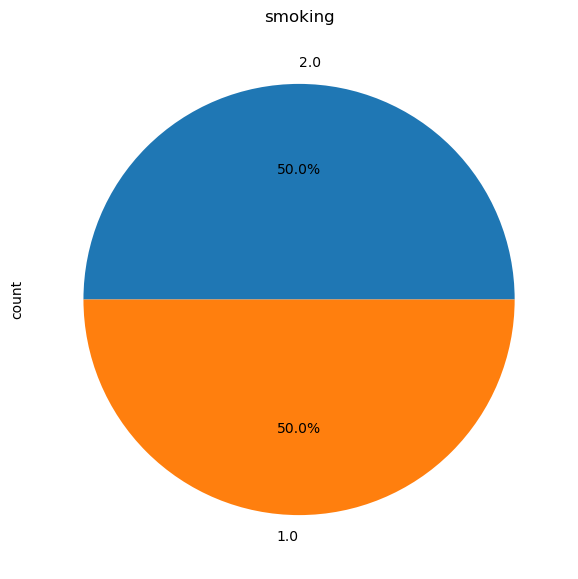

In [22]:
fig, axes = plt.subplots(figsize=(7, 7))
df['smoking'].value_counts().plot.pie(autopct='%1.1f%%')
axes.set_title('smoking')
plt.show()

In [23]:
df['smoking']=df['smoking'].astype(int)
df['sex']=df['sex'].replace({'Female': 0, 'Male': 1})


/var/folders/0c/64_tgxx17czfrpvpt1mh277m0000gn/T/ipykernel_41314/3728794873.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex']=df['sex'].replace({'Female': 0, 'Male': 1})


In [24]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,smoking,DRK_YN
0,1,75,155,60,81.0,1.2,1.2,1.0,1.0,132.0,...,99.0,73.0,14.2,1.0,0.9,26.0,22.0,41.0,2,0
1,0,35,155,50,71.0,0.8,1.2,1.0,1.0,120.0,...,109.0,115.0,11.8,1.0,0.8,19.0,13.0,19.0,1,0
2,0,55,150,55,76.0,0.4,0.4,1.0,1.0,118.0,...,109.0,118.0,14.3,1.0,0.6,23.0,25.0,15.0,1,0
3,0,65,155,65,90.8,0.7,0.7,1.0,1.0,139.0,...,65.0,103.0,13.6,1.0,0.7,18.0,18.0,18.0,1,0
4,0,50,150,65,90.0,1.2,0.5,1.0,1.0,136.0,...,146.0,81.0,15.8,3.0,1.0,44.0,30.0,77.0,1,0


In [25]:

train_copy=df
X = train_copy.drop('smoking', axis=1)
y = train_copy['smoking']

y.head()
X.shape

(22000, 23)

In [26]:
pca=PCA(n_components=2)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_pca = pca.fit_transform(X_scaled)

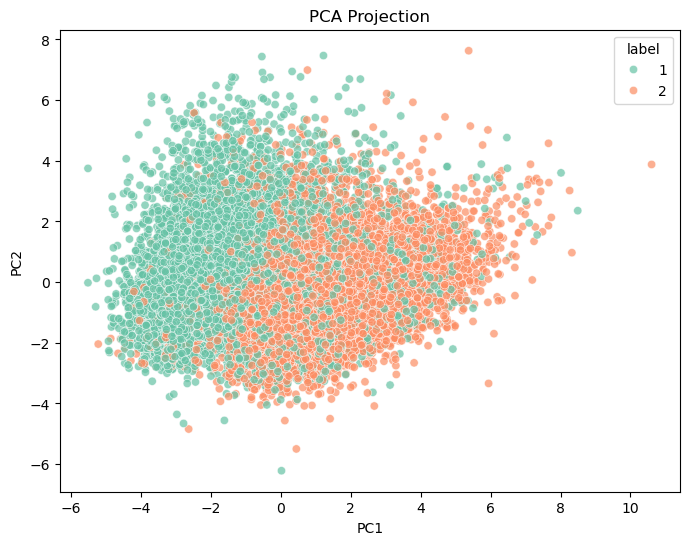

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["label"] = df["smoking"]  

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="label", palette="Set2", alpha=0.7)
plt.title("PCA Projection")
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


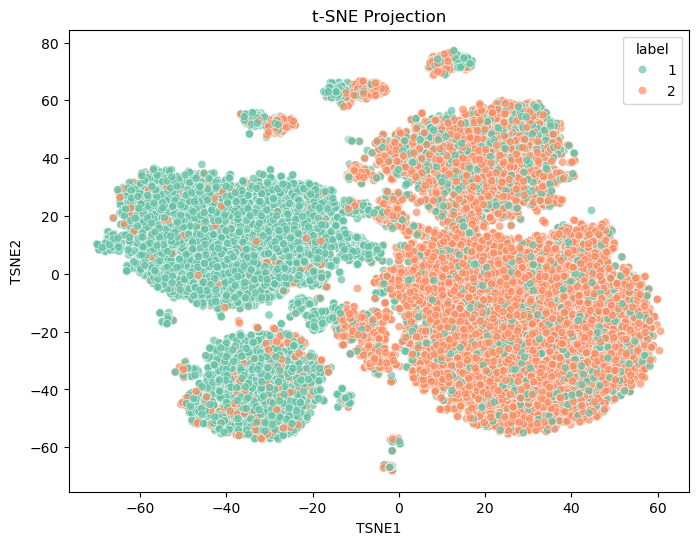

In [28]:


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)


df_tsne = pd.DataFrame(X_tsne, columns=["TSNE1", "TSNE2"])
df_tsne["label"] = y  


plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_tsne, x="TSNE1", y="TSNE2", hue="label", palette="Set2", alpha=0.7)
plt.title("t-SNE Projection")
plt.show()

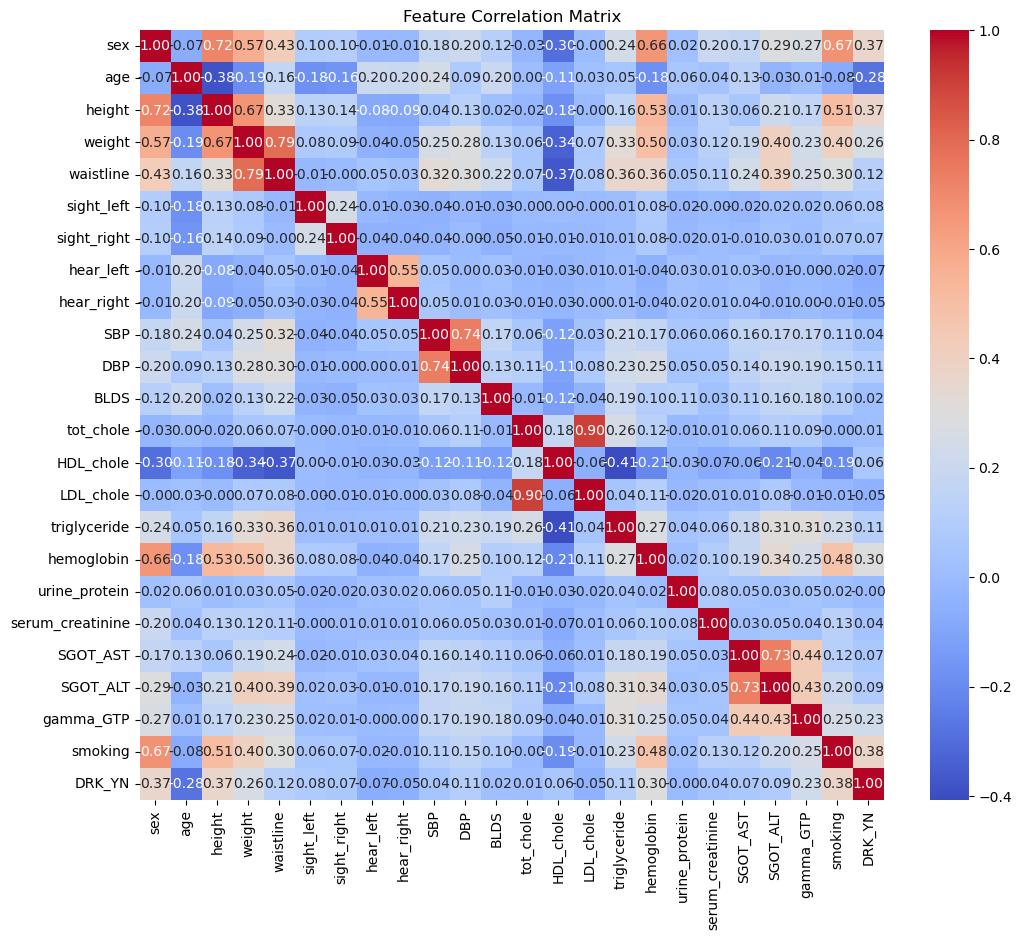

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt


numeric_df = df.select_dtypes(include=['int64', 'float64'])


corr_matrix = numeric_df.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [30]:
#df.to_csv("cleaned3_df.csv")